In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as pl

In [14]:
columns = ['sedentary','LPA','MPA','VPA','steps','duration_score','deep_sleep_in_minutes','resting_heart_rate','restlessness','sleep_duration']
df = pd.read_csv(r'C:\Users\AyanC\OneDrive - Universitetet i Agder\git_ai_projects\Transaction\pmdata_merged_15.csv', sep=',')
df = df[columns]
print (df.head())

   sedentary  LPA  MPA  VPA   steps  duration_score  deep_sleep_in_minutes  \
0        907  107    0    0  3062.0            38.0                  103.0   
1        874   94    0    0  1472.0            38.0                   75.0   
2        990   59    0    0   610.0            34.0                   75.0   
3        740   80    8    4  2177.0            45.0                   99.0   
4        816   67    0    0  1690.0            45.0                  123.0   

   resting_heart_rate  restlessness  sleep_duration  
0                63.0      0.078853             426  
1                65.0      0.099448             472  
2                66.0      0.134100             391  
3                67.0      0.125833             608  
4                66.0      0.122870             557  


In [16]:
#https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
import matplotlib.pyplot as plt

corr = df.corr()
#corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='GnBu')

,sedentary,LPA,MPA,VPA,steps,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,sleep_duration
sedentary,1.000000,-0.718884,-0.454722,-0.464515,-0.422799,-0.385324,-0.270165,-0.334563,-0.234551,-0.884582
LPA,-0.718884,1.000000,0.469349,0.229239,0.446568,0.328399,0.198370,0.258089,0.093006,0.366023
MPA,-0.454722,0.469349,1.000000,0.455061,0.347788,0.155421,0.059540,0.106466,0.012213,0.170842
VPA,-0.464515,0.229239,0.455061,1.000000,0.462291,0.179690,0.015035,0.077534,0.154005,0.259406
steps,-0.422799,0.446568,0.347788,0.462291,1.000000,0.434285,0.234244,0.339929,0.245445,0.211758
duration_score,-0.385324,0.328399,0.155421,0.179690,0.434285,1.000000,0.798753,0.924771,0.638085,0.313456
deep_sleep_in_minutes,-0.270165,0.198370,0.059540,0.015035,0.234244,0.798753,1.000000,0.779986,0.511395,0.269790
resting_heart_rate,-0.334563,0.258089,0.106466,0.077534,0.339929,0.924771,0.779986,1.000000,0.705625,0.309369
restlessness,-0.234551,0.093006,0.012213,0.154005,0.245445,0.638085,0.511395,0.705625,1.000000,0.251431
sleep_duration,-0.884582,0.366023,0.170842,0.259406,0.211758,0.313456,0.269790,0.309369,0.251431,1.000000


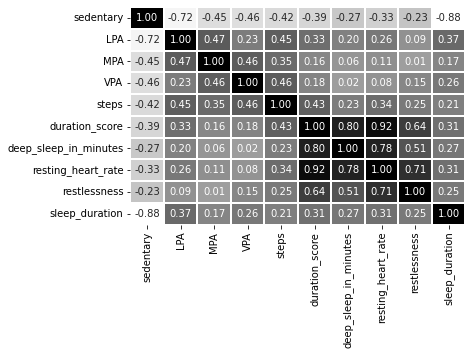

In [17]:
fig, ax = plt.subplots()
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('Greys'), cbar=False, linewidths=1, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('result_pmdata_1.png', bbox_inches='tight', pad_inches=0.0, dpi=300)

In [6]:
columns = ['sedentary', 'LPA', 'MPA', 'VPA', 'steps']
df = pd.read_csv(r'C:\Users\AyanC\OneDrive - Universitetet i Agder\git_ai_projects\Transaction\pmdata_merged_15.csv', sep=',')
df = df[columns]

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,sedentary,LPA,MPA,VPA,steps
sedentary,1.000000,-0.718884,-0.454722,-0.464515,-0.422799
LPA,-0.718884,1.000000,0.469349,0.229239,0.446568
MPA,-0.454722,0.469349,1.000000,0.455061,0.347788
VPA,-0.464515,0.229239,0.455061,1.000000,0.462291
steps,-0.422799,0.446568,0.347788,0.462291,1.000000


In [9]:
def calculate_lebel(df):
    if ((df['steps'] < 5000) and ((df['VPA']*2 + df['MPA'])*7 < 90) and (df['LPA'] >=0)): #sedentary
        return 0
    elif ((df['steps'] >= 5000) and ((df['VPA']*2 + df['MPA'])*7 >= 90) and (df['VPA']*2 + df['MPA'])*7 < 210) or (df['steps'] >= 5000 and df['steps'] <= 7499): #LPA
        return 1
    elif ((df['steps'] >= 5000) and ((df['VPA']*2 + df['MPA'])*7 >= 210) and (df['VPA']*2 + df['MPA'])*7 < 300) or (df['steps'] >= 7500 and df['steps'] <= 9999): #MPA
        return 2
    elif ((df['steps'] >= 5000) and ((df['VPA']*2 + df['MPA'])*7 >= 300) and (df['VPA']*2 + df['MPA'])*7 < 360) or (df['steps'] >= 10000 and df['steps'] <= 12499): #MPA
        return 3
    elif ((df['steps'] >= 5000) and (df['VPA']*2 + df['MPA'])*7 >= 360) or (df['steps'] >= 12500): #VPA
        return 4
    elif (df['steps'] < 5000):
        return 0

df['Activity Level'] = df.apply(calculate_lebel, axis=1)

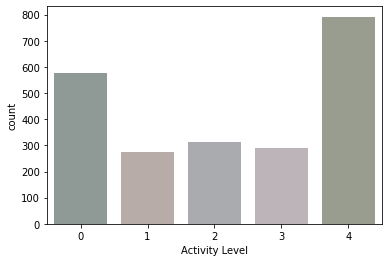

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# count plot on single categorical variable
sns.countplot(x ='Activity Level', data = df, palette = "Set2", saturation = 0.1)
 
plt.savefig('result_pmdata_2.png', bbox_inches='tight', pad_inches=1.0, dpi=300)

In [7]:
df['active'].isnull().values.any()

False

In [8]:
df.shape

(539, 6)

In [9]:
df.to_csv('Moxdata_processed_16.csv')

In [10]:
array = df.values
X = array[:,0:5]
Y = array[:,5]

In [11]:

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X,Y)

set_printoptions(precision=2)
print(fit.scores_)
featured_data = fit.transform(X)
print ("\nFeatured data:\n", featured_data[0:5])


[ 485622.78  434239.95  162037.25  177750.78 1124239.68]

Featured data:
 [[111078   4138   1466    814   9876]
 [112274   4640   1976    704  10074]
 [134114   4104   2560    114  11014]
 [ 80186   3288   2814    176   7656]
 [ 79104   5564   1448    176  12114]]


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
fit = pca.fit(X)
print(("Explained Variance: %s") % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [9.65e-01 2.97e-02 4.06e-03 8.88e-04 3.97e-04]
[[ 9.98e-01  1.85e-02  3.45e-03  9.04e-03  6.16e-02]
 [-6.42e-02  4.12e-01  1.31e-01  1.19e-01  8.91e-01]
 [-6.89e-03 -8.55e-01  3.26e-01  2.52e-01  3.14e-01]
 [-2.31e-04  1.52e-01 -1.76e-01  9.57e-01 -1.73e-01]
 [-7.79e-03 -2.73e-01 -9.20e-01 -7.70e-02  2.71e-01]]


In [13]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_) 

[0.07 0.17 0.16 0.08 0.52]
